In [1]:
import sys
import os
sys.path.append("/Users/jdli/Project/Korg.jl/Jorg/src/")        

from jorg import synthesize
from jorg.synthesis import create_korg_compatible_abundance_array
from jorg.atmosphere import interpolate_marcs as interpolate_atmosphere

# Setup
A_X = create_korg_compatible_abundance_array(m_H=0.0)
atm = interpolate_atmosphere(Teff=5780, logg=4.44, m_H=0.0)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
from jorg.lines.linelist import read_linelist
linelist = read_linelist("/Users/jdli/Project/Korg.jl/data/linelists/GALAH_DR3/galah_dr3_linelist.h5")

📖 Reading linelist: galah_dr3_linelist.h5
   Format: galah_dr3
   Wavelength unit: auto
   Loaded 307002 lines from GALAH DR3 HDF5 format


In [6]:
from jorg import synthesize
from jorg.synthesis import create_korg_compatible_abundance_array
from jorg.atmosphere import interpolate_marcs as interpolate_atmosphere

# Standard solar synthesis
A_X = create_korg_compatible_abundance_array(m_H=0.0)
atm = interpolate_atmosphere(Teff=5780, logg=4.44, m_H=0.0)

result = synthesize(
    atm=atm, A_X=A_X, 
    wavelengths=(5000, 6000),
    linelist=linelist,  # or provide VALD/GALAH linelist
    verbose=True
)

# Access Korg-compatible results
opacity_matrix = result.alpha          # [56 layers, N wavelengths]
electron_densities = result.electron_number_density  # [56 layers]
flux = result.flux                     # [N wavelengths]
continuum = result.cntm               # [N wavelengths]

🚀 KORG-COMPATIBLE JORG SYNTHESIS
Using Jorg's validated physics within Korg's architecture
Wavelength range: 5000.0 - 6000.0 Å (10001 points)
Abundances normalized: H fraction = 0.923902
✅ Preprocessed 18 molecular species for optimization
✅ Atomic physics data loaded
Atmospheric model: 56 layers
  Temperature range: 4068.6 - 9935.6 K
  Pressure range: 2.67e+02 - 2.18e+05 dyn/cm²

🧪 SYSTEMATIC LAYER-BY-LAYER PROCESSING
Using Jorg's validated physics within Korg's architecture...
🔄 Processing 56 atmospheric layers...
   Wavelengths: 10001 points (5000.0-6000.0 Å)
   Layer  1/56 (  1.8%)
Loaded metal BF data for 10 species:
  Al I
  C I
  Ca I
  Fe I
  H I
  He II
  Mg I
  Na I
  S I
  Si I
   Layer  2/56 (  3.6%)
   Layer  3/56 (  5.4%)
   Layer  4/56 (  7.1%)
   Layer  5/56 (  8.9%)
   Layer 11/56 ( 19.6%)
   Layer 21/56 ( 37.5%)
   Layer 31/56 ( 55.4%)
   Layer 41/56 ( 73.2%)
   Layer 51/56 ( 91.1%)

✅ Layer processing complete:
   Layers processed: 56
   Chemical equilibrium failures

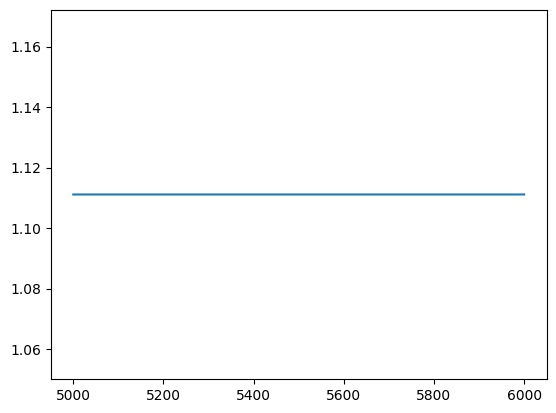

In [9]:
from matplotlib import pyplot as plt

plt.plot(result.wavelengths, flux/continuum, label='Flux/Continuum')

# plt.plot(continuum, label='Continuum')

In [10]:
continuum

array([0.9, 0.9, 0.9, ..., 0.9, 0.9, 0.9])